# Introduction

Channel segregation as introducted by Adel Alturki amoung others in * Distinct Current Modules Shape Cellular Dynamics in Model Neurons * gives us a powerful tool to signifigantly simplify the cell tuning process. This notebook will walk through the process of extending that work to include additional modules which allow us to generate more complex dynamics.

The general modelling process is the same as outlined in the previous [simple spiker notebook](https://github.com/pbcanfield/channel-segregation/blob/main/Simple_Spiker/Simple_Spiker.ipynb), the only addition here is that we will add an additional module to match given cell spiking dynamics.



In [1]:
from neuron import h
import os
import matplotlib.pyplot as plt

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

#First compile our modfiles.
if os.system('nrnivmodl modfiles/') == 0:
    print("Compilation Succeeded.")
else:
    print("Compilation Failed.")

Compilation Succeeded.


# Define the cell and its cell parameters.

This notebook will use a pre-made cell template in a NEURON hoc file which has been developed to demonstrate channel segregation with cell adapatation.

In [20]:
#load in things like the run function.
h.load_file('stdrun.hoc')

#Now lets load in our pre-made hoc template.
h.load_file('CA3.hoc')

#Create a cell object.
h('objectvar cell')
h('cell = new CA3Cell()')

#load the cell into memory.
cell = h.cell

#Define basic simulation parameters.

SIMRUNTIME = 1500
DELAY = 400
INJTIME = 1000
I_INJ = 0.8

h.tstop = SIMRUNTIME
h.v_init = -75

#Now set up vectors to record the membrane potential and the time.
#Record time and membrane potential for tonic cell.
h('objectvar time, potential')
h('time = new Vector()')
h('potential = new Vector()')
h('potential.record(&cell.soma.v(0.5))')
h('time.record(&t)')

#Extract data
time = h.time
potential = h.potential


	Vector[6] 
	Vector[5] 


In [21]:
#Plot membrane potential of tonic cell.
def plot_membrane():
    plt.close()
    plt.figure(figsize = (20,5))
    plt.plot(time, potential)
    plt.xlabel('Time')
    plt.ylabel('Membrane Potential')
    plt.show()



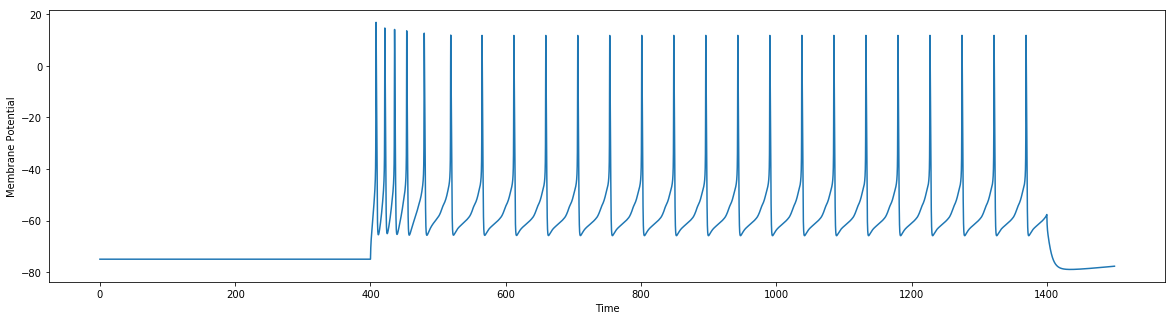

In [22]:
h('objectvar i_inj')
h('cell.soma i_inj = new IClamp(0.5)')
iclamp = h.i_inj
iclamp.dur   = INJTIME
iclamp.amp   = I_INJ
iclamp.delay = DELAY


#Now lets run and plot.
h.run()
plot_membrane()
